In [ ]:
#DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [ ]:
""" Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. 
You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis."""


In [ ]:
import pandas as pd
df=pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df_cont=df.drop(df.columns[[1,3,5,6,7,8,9,13,14]],axis=1)
df_cont

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [ ]:
# applying  Min-Max Scaling Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cont_scaled = pd.DataFrame(scaler.fit_transform(df_cont), columns=df_cont.columns)

df_cont_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [ ]:
# applying Standard Scaling

import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cont_scaled = scaler.fit_transform(df_cont)

df_cont_scaled = pd.DataFrame(df_cont_scaled, columns=df_cont.columns)
df_cont_scaled


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


•	Discuss the scenarios where each scaling technique is preferred and why

**1) Standard Scaling (Z-score Normalization)**

**Preferred Scenarios:**

1)Algorithms Sensitive to Feature Distribution: Algorithms like Support Vector Machines (SVM) and Principal Component Analysis (PCA) assume data is centered around zero and normally distributed. Standard scaling helps meet this assumption.

2)Outliers Present: Standard scaling is less affected by outliers than Min-Max scaling because it uses the mean and standard deviation, which can provide a more robust scaling in the presence of extreme values.

3)When Data is Normally Distributed: If the data is approximately normally distributed, standard scaling can enhance the performance of many statistical models.

**2) Min-Max Scaling**

**Preferred Scenarios:**

1)Algorithms Sensitive to Scale: Algorithms like k-nearest neighbors (KNN) and neural networks are sensitive to the scale of input features. Min-max scaling ensures that all features are on the same scale (typically [0, 1]), which can improve performance.

2)Bounded Features: When the features are expected to be within a certain range, min-max scaling is beneficial as it rescales the data into that specific range.

3)No Outliers: If the dataset does not contain outliers, min-max scaling can be effective, providing a simple transformation to maintain the relative relationships between the values.


In [ ]:
df_cat=df.drop(df.columns[[0,2,4,10,11,12]],axis=1)
df_cat

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


# Apply One-Hot Encoding to categorical variables with less than 5 categories.
# Use Label Encoding for categorical variables with more than 5 categories.


In [ ]:
# Calculating value counts for each column separately
category_counts = {}
for column in df.columns:
    try:
        category_counts[column] = df[column].value_counts()
    except TypeError:
        print(f"Skipping column '{column}' due to mixed data types.")
        category_counts[column] = "Mixed data types - value counts not applicable"


for column, counts in category_counts.items():
    print(f"Value counts for column '{column}':\n{counts}\n")

Value counts for column 'age':
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

Value counts for column 'workclass':
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Value counts for column 'fnlwgt':
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64

Value counts for column 'education':
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th            

In [ ]:
df_cat_onehot=df_cat.drop(df_cat.columns[[0,1,2,3,4,5,7]],axis=1)
df_cat_onehot

,sex,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K
...,...,...
32556,Female,<=50K
32557,Male,>50K
32558,Female,<=50K
32559,Male,<=50K


In [ ]:
# applying one hot encoding to variables of sex and income

df_cat_onehot = pd.get_dummies(df_cat_onehot, columns=['sex', 'income'], prefix=['sex', 'income'])
df_cat_onehot

,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,True,False,True,False
...,...,...,...,...
32556,True,False,True,False
32557,False,True,False,True
32558,True,False,True,False
32559,False,True,True,False


In [ ]:
df_cat_label=df_cat.drop(df_cat.columns[[6,8]],axis=1)
df_cat_label

,workclass,education,marital_status,occupation,relationship,race,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [ ]:
# applying label encoding to all other variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df_cat_label.columns:
  df_cat_label[column] = le.fit_transform(df_cat_label[column])

df_cat_label

,workclass,education,marital_status,occupation,relationship,race,native_country
0,7,9,4,1,1,4,39
1,6,9,2,4,0,4,39
2,4,11,0,6,1,4,39
3,4,1,2,6,0,2,39
4,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,39
32557,4,11,2,7,0,4,39
32558,4,11,6,1,4,4,39
32559,4,11,4,1,3,4,39


•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

**One-Hot Encoding**

**Pros:**

1) No Ordinal Relationships: One-hot encoding creates binary columns for each category, avoiding any implied ordinal relationship. This is crucial for algorithms that assume numerical order.

2)Better for Algorithms: Many algorithms (like logistic regression and neural networks) perform better with one-hot encoded variables since they treat each category independently.

3)Prevent Misleading Interpretations: Since categories are represented as separate columns, there’s no risk of introducing bias or incorrect assumptions about the data.

**Cons:**

1)Increased Dimensionality: For categorical features with many unique values, one-hot encoding can significantly increase the number of dimensions (sparse data), leading to potential issues with model complexity and performance.

2)Data Sparsity: The resulting dataset can become sparse, which can affect memory usage and computational efficiency, especially in high-dimensional spaces.

3)Potential Overfitting: With a large number of features, there’s a risk of overfitting, particularly with smaller datasets.

**Label Encoding**

**Pros:**

1)Simple and Efficient: Label encoding is straightforward to implement and requires less memory since it uses a single column to represent categorical values as integers.

2)Preserves Ordinality: If the categorical data has a natural order (e.g., "low," "medium," "high"), label encoding preserves this order, which can be beneficial for certain algorithms.

**Cons:**

1)Implied Ordinality: Label encoding assigns numerical values to categories, which can introduce unintended ordinal relationships. For instance, the model might interpret "2" as being greater than "1," leading to biased results.

2)Not Suitable for Non-Ordinal Data: For nominal categories (no inherent order), label encoding can mislead the model, resulting in poor performance.

3)Limited Applicability: Many algorithms may struggle with label-encoded features, especially those that expect categorical input to be one-hot encoded.

In [ ]:
df_catfinal=pd.concat([df_cat_label,df_cat_onehot],axis=1)
df_catfinal

,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,7,9,4,1,1,4,39,False,True,True,False
1,6,9,2,4,0,4,39,False,True,True,False
2,4,11,0,6,1,4,39,False,True,True,False
3,4,1,2,6,0,2,39,False,True,True,False
4,4,9,2,10,5,2,5,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,39,True,False,True,False
32557,4,11,2,7,0,4,39,False,True,False,True
32558,4,11,6,1,4,4,39,True,False,True,False
32559,4,11,4,1,3,4,39,False,True,True,False


In [ ]:
# Final dataframe
df_final=pd.concat([df_catfinal,df_cont_scaled],axis=1)
df_final

,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,7,9,4,1,1,4,39,False,True,True,False,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,6,9,2,4,0,4,39,False,True,True,False,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,4,11,0,6,1,4,39,False,True,True,False,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,4,1,2,6,0,2,39,False,True,True,False,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,4,9,2,10,5,2,5,True,False,True,False,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,39,True,False,True,False,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,4,11,2,7,0,4,39,False,True,False,True,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,4,11,6,1,4,4,39,True,False,True,False,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,4,11,4,1,3,4,39,False,True,True,False,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [ ]:
# 5 new features that could be beneficial for the model

df_final_age_education_interaction = df_final['age'] * df_final['education_num']
df_final_capital_gain_loss_ratio = df_final['capital_gain'] / (df_final['capital_loss'] + 1)  # Add 1 to avoid division by zero
df_final_hours_per_week_age_ratio  = df_final['hours_per_week'] / df_final['age']
df_final_capital_gain_loss_sum = df_final['capital_gain'] + df_final['capital_loss']




**1. Age-Education Interaction:**  This feature captures the interaction between age and education level. It helps to understand how the combination of these two factors affects the target variable (e.g., income).

**2. Capital Gain/Loss Ratio:** This feature provides a measure of the relative success of capital gains compared to capital losses.

**3. Hours Per Week to Age Ratio:** This feature examines the relationship between work hours and age. It helps identify if younger individuals tend to work more or less compared to older individuals relative to their age.

**4. Capital Gain/Loss Sum:** This feature combines capital gains and losses into a single measure, reflecting the total capital activity of an individual. It can provide insights into overall investment behavior and financial performance.


In [ ]:
# applying log transformation

import numpy as np

df_final_age_education_interaction_log = np.log1p(df_final_age_education_interaction)  # Applying log transformation

# Convert the result to a DataFrame
if not isinstance(df_final_age_education_interaction_log, pd.DataFrame):
  df_final_age_education_interaction_log = pd.DataFrame(df_final_age_education_interaction_log, columns=['log_age_education_interaction'])
df_final_age_education_interaction_log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_age_education_interaction
0,0.034211
1,0.667778
2,0.017754
3,NaN
4,-2.122715
...,...
32556,-1.003613
32557,-0.044662
32558,-0.911306
32559,0.412535


Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

1. Normalization of Distribution

2. Reducing the Impact of Outliers

3. Enhancing Interpretability

4. Homogeneity of Variance

In [ ]:
df_feat=pd.concat([df_final_age_education_interaction,df_final_capital_gain_loss_ratio,df_final_hours_per_week_age_ratio,df_final_capital_gain_loss_sum],axis=1)
df_feat

,0,1,2,3
0,0.034803,0.189513,-1.155161,-0.068207
1,0.949900,-0.186280,-2.654557,-0.362580
2,0.017912,-0.186280,0.830857,-0.362580
3,-1.265770,-0.186280,-0.033517,-0.362580
4,-0.880294,-0.186280,0.045670,-0.362580
...,...,...,...,...
32556,-0.633447,-0.186280,0.232497,-0.362580
32557,-0.043679,-0.186280,-0.340723,-0.362580
32558,-0.598001,-0.186280,-0.024887,-0.362580
32559,0.510643,-0.186280,1.361604,-0.362580


In [ ]:
df_feat.shape

(32561, 4)

In [ ]:
# applying the Isolation Forest algorithm to identify and remove outliers

from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination='auto', random_state=42)
model.fit(df_feat)
outlier_predictions = model.predict(df_feat)
outlier_indices = df_feat[outlier_predictions == -1].index

# Remove outliers from dataframe
df_feat_no_outliers = df_feat.drop(outlier_indices)

# Now df_feat_no_outliers contains data without the identified outliers.

print(f"Number of outliers removed: {len(outlier_indices)}")


Number of outliers removed: 3213


Discuss how outliers can affect model performance.

Outliers can significantly impact model performance in various ways, influencing both the training process and the predictive accuracy of machine learning models. Here’s how outliers can affect models.

1. Biasing Model Parameters

2. Impact on Predictions

3. Increased Complexity

4. Loss Function Sensitivity

5. Affect Model Selection

6. Interpretability Issues

In [ ]:
df_feat_no_outliers.shape

(29348, 4)

In [ ]:
# Applying the Predictive Power Score to find and discuss the relationships between features

#!pip install ppscore

import ppscore as pps

# PPS matrix
pps_matrix = pps.matrix(df_feat_no_outliers)
pps_matrix


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,0,0,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,0,1,0.000000,regression,True,mean absolute error,0.024349,0.045917,DecisionTreeRegressor()
2,0,2,0.000000,regression,True,mean absolute error,1.243834,1.471584,DecisionTreeRegressor()
3,0,3,0.000000,regression,True,mean absolute error,0.075330,0.136129,DecisionTreeRegressor()
4,1,0,0.000000,regression,True,mean absolute error,0.560488,0.567549,DecisionTreeRegressor()
5,1,1,1.000000,predict_itself,True,None,0.000000,1.000000,None
6,1,2,0.000000,regression,True,mean absolute error,1.243834,1.279304,DecisionTreeRegressor()
7,1,3,0.993393,regression,True,mean absolute error,0.075330,0.000498,DecisionTreeRegressor()
8,2,0,0.000000,regression,True,mean absolute error,0.560488,0.616008,DecisionTreeRegressor()
9,2,1,0.000000,regression,True,mean absolute error,0.024349,0.045916,DecisionTreeRegressor()


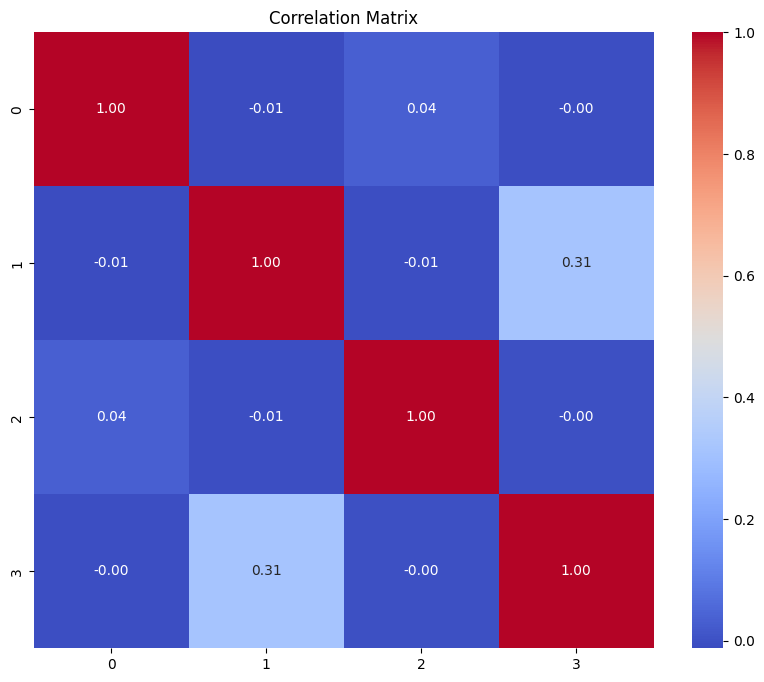

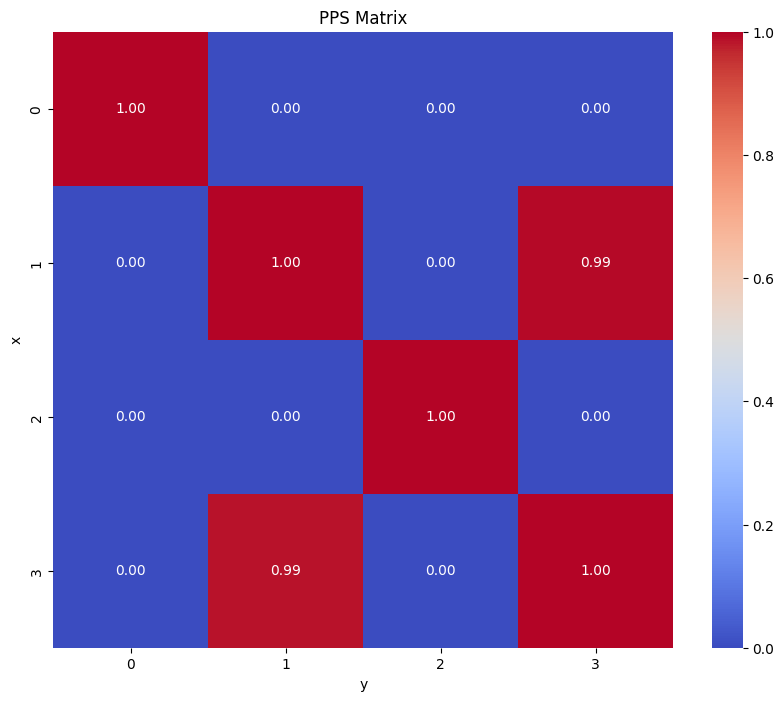

In [ ]:
# Comparing the findings with the correlation matrix.

import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot PPS matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix.pivot(index='x', columns='y', values='ppscore'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('PPS Matrix')
plt.show()